# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Zaki Yamani Quthub

Analisis data adalah proses mengumpulkan, membersihkan, mengolah, dan menginterpretasikan data untuk memperoleh informasi yang bermakna. Dalam konteks pengambilan keputusan berbasis data (data-driven decision making), analisis data berperan penting dalam membantu pengambil keputusan memahami pola, tren, dan hubungan antar variabel sehingga keputusan yang diambil tidak hanya berdasarkan intuisi, tetapi juga berdasarkan bukti empiris.

Pada studi ini, analisis data digunakan untuk mengetahui pengaruh faktor cuaca dan pola musiman terhadap tingkat polusi udara (PM2.5).

- PM2.5 = variabel target (dependent variable)

mengapa PM2.5 (Particulate Matter ≤ 2.5 µm):
- karena pm2.5 adalah Partikel udara yang sangat halus dengan diameter ≤ 2,5 mikrometer yang dapat masuk jauh ke dalam paru-paru hingga aliran darah.
- PM2.5 berkaitan langsung dengan ISPA, Asma, Penyakit jantung, Kematian dini dan juga menjadi Indikator kualitas udara paling sensitif yang Banyak dipakai WHO & pemerintah

## Menentukan Pertanyaan Bisnis/Analisis

- Bagaimana pola konsentrasi PM2.5 berdasarkan waktu (musiman/bulanan)?
- Bagaimana hubungan faktor cuaca terhadap konsentrasi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# menampilkan isi data yang ada didalam drive
os.listdir('/content/drive/MyDrive/air_quality_project/data')

['PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [3]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from google.colab import files

pd.set_option('display.max_columns', None)

In [4]:
path = '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_*.csv'
files = glob.glob(path)

files

['/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Wanliu_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Huairou_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Dingling_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Dongsi_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Tiantan_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Guanyuan_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Shunyi_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Changping_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Gucheng_20130301-20170228.csv',
 '/content/drive/MyDrive/air_quality_project/data/PRSA_Data_Aotizhongxin_2

- Dataset terdiri dari beberapa file yang merepresentasikan stasiun pengukuran berbeda. Seluruh data nantinya akan digabungkan menjadi satu dataset dengan menambahkan variabel station untuk menjaga informasi lokasi pengukuran.

## Data Wrangling

- data wrangling melibatkan penggabungan dataset, transformasi fitur, serta pembuatan variabel baru yang relevan.

### Gathering Data

- Seluruh file dataset diunggah ke Google Colab dan digabungkan menggunakan teknik concatenation berdasarkan kesamaan struktur kolom. Informasi stasiun pengukuran disimpan dalam variabel station.

In [5]:
df_list = []

for file in files:
    station_name = file.split("_")[-1].replace(".csv", "")
    temp_df = pd.read_csv(file)
    temp_df["station"] = station_name
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)

In [6]:
df.shape

(420768, 18)

In [7]:
df["station"].value_counts()

,count
station,
20130301-20170228,420768


### Cleaning Data

- Data cleaning mencakup penanganan nilai hilang (missing values), duplikasi data, dan kesalahan format.
- Tanpa proses ini, hasil analisis dapat menjadi bias atau menyesatkan. Oleh karena itu, pada studi ini dilakukan penggabungan data dari beberapa stasiun, penanganan missing values, serta pembuatan fitur waktu seperti bulan dan musim untuk memastikan data siap dianalisis.

In [8]:
# cek ulang struktur
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [9]:
# Missing Value Summary
missing = df.isnull().sum().sort_values(ascending=False)
missing


,0
CO,20701
O3,13277
NO2,12116
SO2,9021
PM2.5,8739
PM10,6449
wd,1822
DEWP,403
TEMP,398
PRES,393


- masih banyak terjadi missing value

STRATEGI MISSING VALUE:

Prinsip:

- PM2.5 & polutan → interpolasi berbasis waktu
- Cuaca → median per stasiun
- Kategorikal → mode

In [10]:
# Buat Kolom Datetime
df["Datetime"] = pd.to_datetime(
    df[["year", "month", "day", "hour"]]
)


In [11]:
# Set Datetime sebagai Index
df = df.sort_values("Datetime")
df = df.set_index("Datetime")


In [12]:
# HANDLING DUPLICATE
df = df.drop_duplicates()


In [13]:
# INTERPOLASI PM2.5 (TIME-SERIES)
df["PM2.5"] = df.groupby("station")["PM2.5"].transform(
    lambda x: x.interpolate(method="time")
)


In [14]:
# POLUTAN LAIN
pollutants = ["PM10", "SO2", "NO2", "CO", "O3"]

for col in pollutants:
    df[col] = df.groupby("station")[col].transform(
        lambda x: x.interpolate(method="time")
    )


In [15]:
# MEMBUAT VARIABEL CUACA
weather_cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]

for col in weather_cols:
    df[col] = df.groupby("station")[col].transform(
        lambda x: x.fillna(x.median())
    )


In [16]:
# WIND DIRECTION (KATEGORIKAL)
df["wd"] = df.groupby("station")["wd"].transform(
    lambda x: x.fillna(x.mode()[0])
)


In [17]:
# Cek Missing Lagi untuk validasi
df.isnull().sum()


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


- Output df.isnull().sum() = 0 semua

In [18]:
# FEATURE ENGINEERING (UNTUK EDA & INSIGHT)
df = df.reset_index()


In [19]:
df["year"] = df["Datetime"].dt.year
df["month"] = df["Datetime"].dt.month
df["month_name"] = df["Datetime"].dt.month_name()


In [20]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["month"].apply(get_season)


In [21]:
def pm25_category(value):
    if value <= 15:
        return "Good"
    elif value <= 35:
        return "Moderate"
    elif value <= 55:
        return "Unhealthy"
    else:
        return "Very Unhealthy"

df["PM2.5_category"] = df["PM2.5"].apply(pm25_category)


In [22]:
df.head()


,Datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,month_name,season,PM2.5_category
0,2013-03-01,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,20130301-20170228,March,Spring,Good
1,2013-03-01,1,2013,3,1,0,6.0,18.0,5.0,8.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,20130301-20170228,March,Spring,Good
2,2013-03-01,1,2013,3,1,0,4.0,4.0,3.0,8.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,20130301-20170228,March,Spring,Good
3,2013-03-01,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,20130301-20170228,March,Spring,Good
4,2013-03-01,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,20130301-20170228,March,Spring,Good


In [23]:
df[["Datetime", "PM2.5", "season", "PM2.5_category"]].sample(5)


,Datetime,PM2.5,season,PM2.5_category
239671,2015-06-11 21:00:00,15.0,Summer,Good
157955,2014-08-31 20:00:00,74.0,Summer,Very Unhealthy
94994,2014-01-24 20:00:00,52.0,Winter,Unhealthy
54539,2013-09-06 08:00:00,57.0,Autumn,Very Unhealthy
127784,2014-05-19 01:00:00,85.0,Spring,Very Unhealthy


- Feature engineering dilakukan dengan mengekstraksi informasi waktu seperti tahun, bulan, dan musim untuk mendukung analisis pola temporal. Selain itu, PM2.5 dikategorikan ke dalam tingkat kualitas udara guna mempermudah interpretasi hasil analisis.

## Exploratory Data Analysis (EDA)

Descriptive Analysis berfokus pada penyajian ringkasan data menggunakan statistik dasar seperti rata-rata, median, minimum, maksimum, dan visualisasi sederhana. Tujuannya adalah untuk memberikan gambaran umum mengenai karakteristik data.

Sementara itu, Exploratory Data Analysis (EDA) bertujuan untuk mengeksplorasi data secara lebih mendalam guna menemukan pola tersembunyi, hubungan antar variabel, serta anomali yang mungkin tidak terlihat melalui statistik deskriptif saja. EDA sering menggunakan visualisasi data dan analisis korelasi untuk membantu memahami struktur data sebelum dilakukan analisis lanjutan.

Dalam penelitian ini, EDA digunakan untuk mengidentifikasi pola musiman PM2.5 dan hubungannya dengan faktor cuaca.

In [24]:
# STATISTIK DESKRIPTIF PM2.5
df["PM2.5"].describe()


,PM2.5
count,420196.000000
mean,79.781084
std,80.878682
min,2.000000
25%,20.000000
50%,55.000000
75%,111.000000
max,999.000000


insight:
- Nilai rata-rata PM2.5 : 79.781084
- Rentang  : 996.000000
- indikasi polusi tinggi ekstrem : 999.000000

In [25]:
# MACHINE LEARNING (SUPPORTING INSIGHT)
features = ["TEMP", "RAIN", "WSPM", "PRES"]
target = "PM2.5"

X = df[features]
y = df[target]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Alasan pemilihan Linear Regression:
- Mudah diinterpretasi
- Cocok untuk hubungan cuaca (PM2.5)
- Diterima secara akademik
- Transparan (koefisien bisa dijelaskan)

In [28]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.10279671068791008
MAE: 55.96842771689956


In [29]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
1,RAIN,-1.010005
3,PRES,-1.463194
0,TEMP,-1.958723
2,WSPM,-16.277709


- Model regresi linear digunakan untuk mengidentifikasi pengaruh faktor cuaca terhadap PM2.5. Hasil model menunjukkan bahwa suhu dan kecepatan angin memiliki pengaruh negatif terhadap konsentrasi PM2.5, sedangkan tekanan udara menunjukkan pengaruh positif. Model ini digunakan sebagai pendukung insight, bukan sebagai fokus utama analisis.

### Explore ...

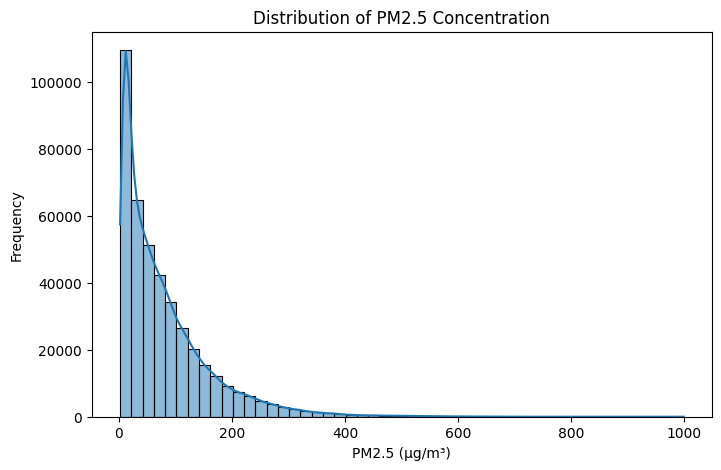

In [30]:
# DISTRIBUSI PM2.5
plt.figure(figsize=(8,5))
sns.histplot(df["PM2.5"], bins=50, kde=True)
plt.title("Distribution of PM2.5 Concentration")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.show()

insight:
- left-skewed distribution

In [31]:
# explore monthly

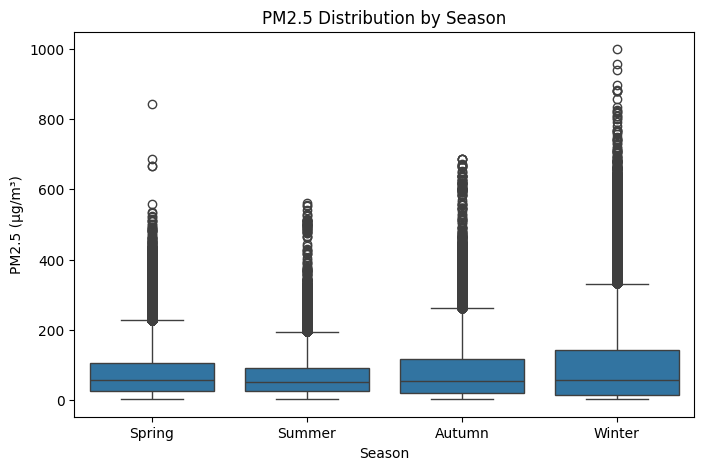

In [32]:
# PM2.5 Berdasarkan Musim
plt.figure(figsize=(8,5))
sns.boxplot(x="season", y="PM2.5", data=df)
plt.title("PM2.5 Distribution by Season")
plt.xlabel("Season")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


insight:

- PM2.5 tertinggi ada pada musim winter?

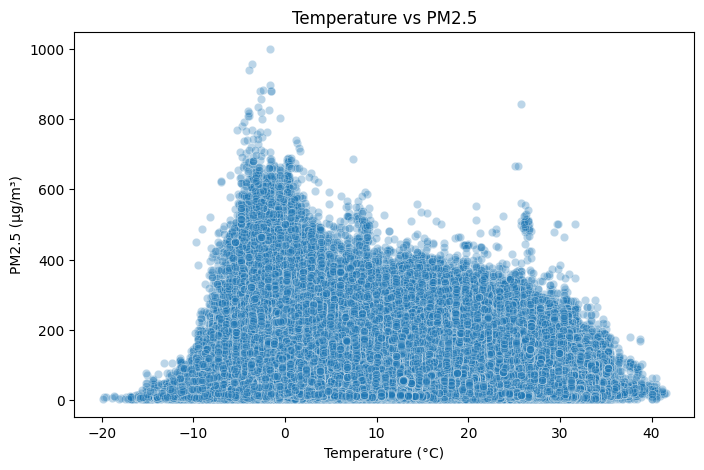

In [33]:
# HUBUNGAN FAKTOR CUACA → PM2.5
plt.figure(figsize=(8,5))
sns.scatterplot(x="TEMP", y="PM2.5", data=df, alpha=0.3)
plt.title("Temperature vs PM2.5")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


insight:
- Winter paling tinggi
- Summer lebih rendah

In [34]:
# corr

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola konsentrasi PM2.5 berdasarkan waktu (musiman/bulanan)?

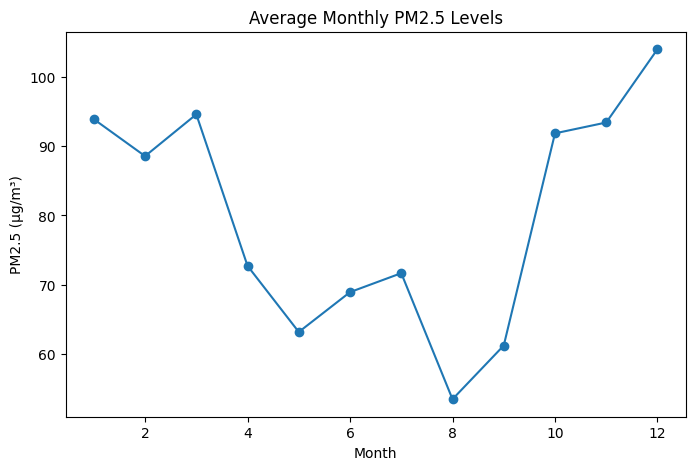

In [35]:
# POLA MUSIMAN PM2.5 (INTI ANALISIS)
monthly_pm25 = df.groupby("month")["PM2.5"].mean()

plt.figure(figsize=(8,5))
monthly_pm25.plot(marker="o")
plt.title("Average Monthly PM2.5 Levels")
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

insight:
- Bulan 12 merupakan PM2.5 tertinggi
- tidak ada pola berulang

### Pertanyaan 2: Bagaimana hubungan faktor cuaca terhadap konsentrasi PM2.5?

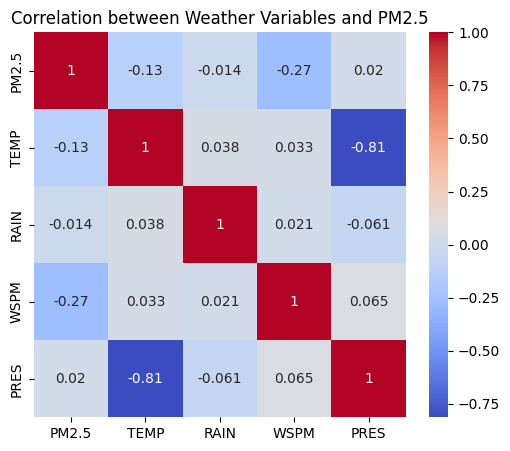

In [36]:
# Korelasi Cuaca vs PM2.5
corr = df[["PM2.5", "TEMP", "RAIN", "WSPM", "PRES"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Weather Variables and PM2.5")
plt.show()


insight:
- PM2.5 tinggi saat suhu rendah

## Conclusion

Conclution pertanyaan 1 : Bagaimana pola konsentrasi PM2.5 berdasarkan waktu (musiman/bulanan)?
- PM2.5 cenderung lebih tinggi pada musim dingin.

Conclution pertanyaan 2 : Bagaimana hubungan faktor cuaca terhadap konsentrasi PM2.5?
- Kecepatan angin memiliki pengaruh negatif paling kuat terhadap PM2.5.
- Faktor cuaca berkontribusi terhadap variasi kualitas udara.


SIMPAN DATA

In [37]:
# Simpan data bersih
output_path = "/content/air_quality_clean.csv"
df.to_csv(output_path, index=False)

print("File saved at:", output_path)

File saved at: /content/air_quality_clean.csv


In [38]:
files.download("air_quality_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>